
# 🧠 Tech Challenge - Módulo 1  
### Pós-Graduação em IA para Devs - FIAP  

**Autor:** José Airton Moreira Filho  
**Projeto:** Diagnóstico de Câncer de Mama com Machine Learning  

---
## 🎯 Objetivo
O objetivo deste projeto é aplicar técnicas de *Machine Learning* para auxiliar o diagnóstico médico de **câncer de mama**, classificando os tumores como **malignos** ou **benignos** com base em características extraídas de exames laboratoriais.


## 📊 1. Importação das bibliotecas e datasets

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

import shap
import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

caminho_dados = '../data/data.csv'
df = pd.read_csv(caminho_dados)

print('linhas x colunas do dataset:', df.shape)
df.head()


Formato do dataset: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 🔎 2. Exploração e análise do dataset

In [2]:

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:

print('Valores ausentes por coluna:')
print(df.isnull().sum())


Valores ausentes por coluna:
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 3

diagnosis
B    357
M    212
Name: count, dtype: int64


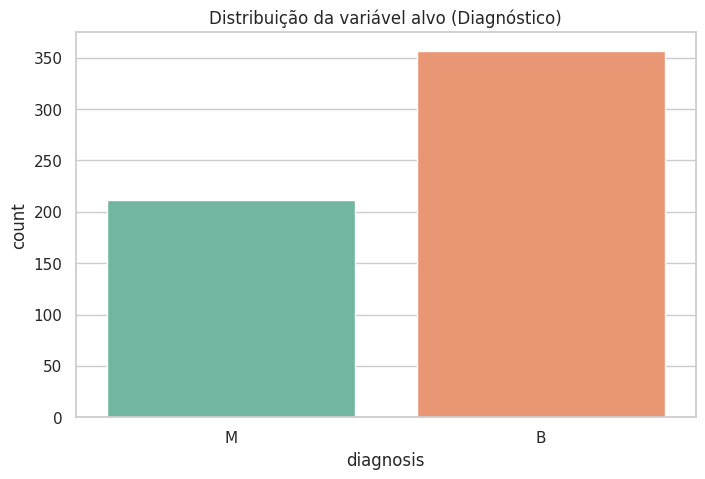

In [8]:

if 'diagnosis' in df.columns:
    print(df['diagnosis'].value_counts())
    sns.countplot(x='diagnosis', data=df, palette='Set2')
    plt.title('Distribuição da variável alvo (Diagnóstico)')
    plt.show()


Top 10 variáveis mais correlacionadas com o diagnóstico:
diagnosis_encoded       1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis_encoded, dtype: float64


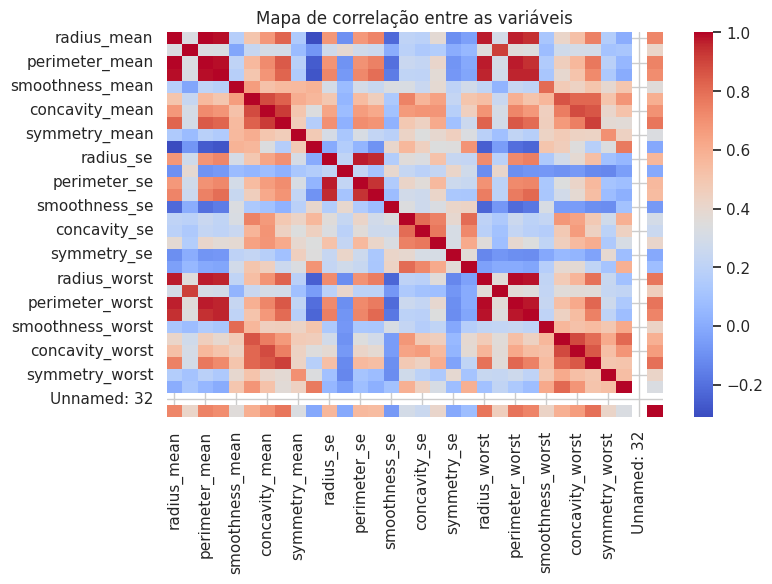

In [9]:

corr = df.corr(numeric_only=True)
le = LabelEncoder()
if 'diagnosis' in df.columns:
    df['diagnosis_encoded'] = le.fit_transform(df['diagnosis'])
    corr_target = df.corr(numeric_only=True)['diagnosis_encoded'].sort_values(ascending=False)
    print('Top 10 variáveis mais correlacionadas com o diagnóstico:')
    print(corr_target.head(10))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Mapa de correlação entre as variáveis')
plt.show()


## 🧹 3. Pré-processamento dos dados

In [12]:

colunas_descartar = [col for col in df.columns if 'id' in col.lower()]
df.drop(columns=colunas_descartar, inplace=True, errors='ignore')

le = LabelEncoder()
df['diagnosis_encoded'] = le.fit_transform(df['diagnosis'])

X = df.drop(columns=['diagnosis', 'diagnosis_encoded'], errors='ignore')
X = X.dropna(axis=1, how='all')
X = X.select_dtypes(include=['float64', 'int64'])

imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

y = df['diagnosis_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Tamanho treino:', X_train.shape, '| Tamanho teste:', X_test.shape)


Tamanho treino: (455, 30) | Tamanho teste: (114, 30)


## ⚙️ 4. Treinamento dos modelos de Machine Learning

,Modelo,Accuracy,Recall,F1-Score
0,Regressão Logística,0.964912,0.928571,0.951220
1,Árvore de Decisão,0.921053,0.833333,0.886076


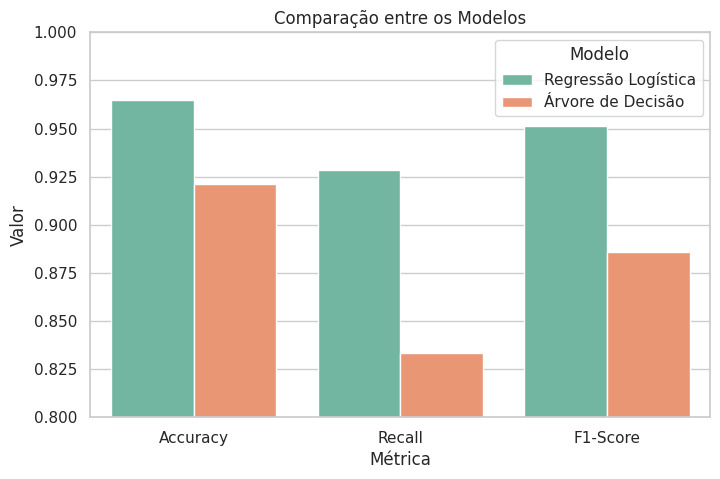

In [13]:

modelo_lr = LogisticRegression(random_state=42, max_iter=1000)
modelo_lr.fit(X_train_scaled, y_train)
y_pred_lr = modelo_lr.predict(X_test_scaled)

modelo_dt = DecisionTreeClassifier(random_state=42, max_depth=5)
modelo_dt.fit(X_train_scaled, y_train)
y_pred_dt = modelo_dt.predict(X_test_scaled)

resultados = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Árvore de Decisão'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt)],
    'Recall': [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_dt)],
    'F1-Score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_dt)]
})

display(resultados)

sns.barplot(data=resultados.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor'),
            x='Métrica', y='Valor', hue='Modelo', palette='Set2')
plt.title('Comparação entre os Modelos')
plt.ylim(0.8, 1.0)
plt.show()


## 📈 5. Avaliação detalhada e explicabilidade

In [14]:

print('--- Regressão Logística ---')
print(classification_report(y_test, y_pred_lr, target_names=['Benigno', 'Maligno']))

print('\n--- Árvore de Decisão ---')
print(classification_report(y_test, y_pred_dt, target_names=['Benigno', 'Maligno']))


--- Regressão Logística ---
              precision    recall  f1-score   support

     Benigno       0.96      0.99      0.97        72
     Maligno       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


--- Árvore de Decisão ---
              precision    recall  f1-score   support

     Benigno       0.91      0.97      0.94        72
     Maligno       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



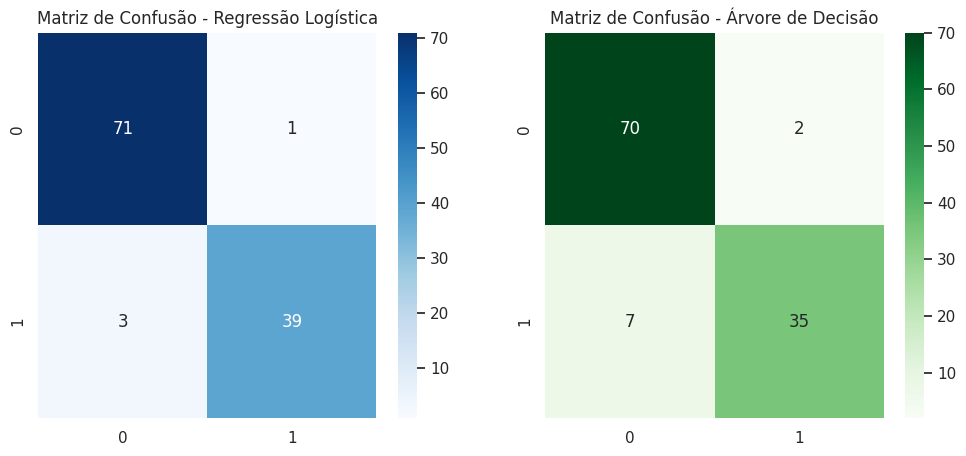

In [15]:

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Matriz de Confusão - Regressão Logística')
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Matriz de Confusão - Árvore de Decisão')
plt.show()


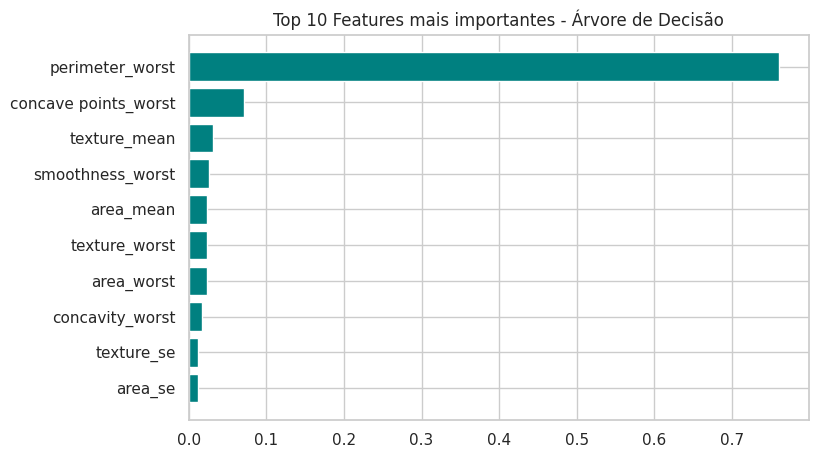

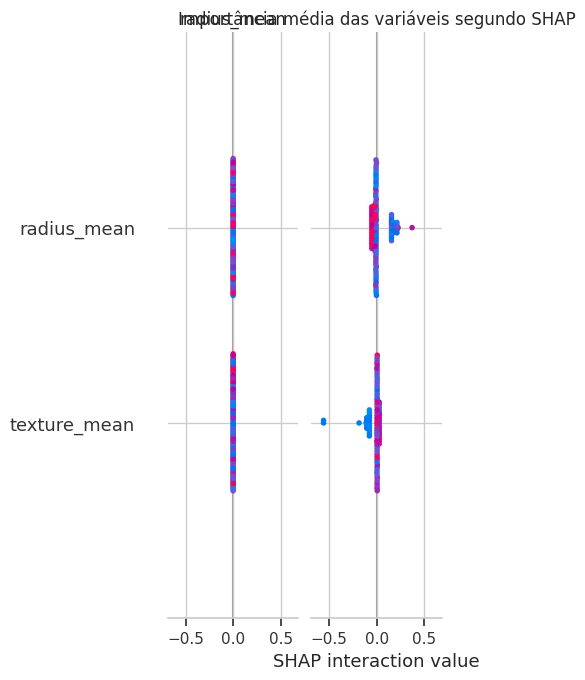

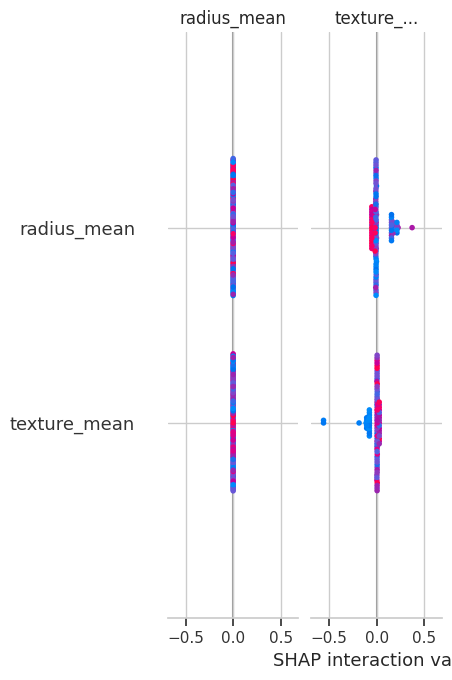

In [18]:

importances = modelo_dt.feature_importances_
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], color='teal')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Top 10 Features mais importantes - Árvore de Decisão')
plt.show()

# SHAP - Explicabilidade do modelo
explainer = shap.TreeExplainer(modelo_dt)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
shap_values = explainer.shap_values(X_test_scaled_df)
if isinstance(shap_values, list):
    shap_array = shap_values[1]  # modelos antigos retornam [0] e [1]
else:
    shap_array = shap_values     # modelos novos retornam apenas 1 matriz

# Gráfico de barras
shap.summary_plot(shap_array, X_test_scaled_df, plot_type='bar', show=False)
plt.title('Importância média das variáveis segundo SHAP')
plt.show()

# Gráfico detalhado
shap.summary_plot(shap_array, X_test_scaled_df, show=False)
plt.show()


## 🧩 6. Conclusão e discussão crítica

Neste projeto, desenvolvemos um pipeline completo de aprendizado de máquina para diagnóstico de **câncer de mama**, utilizando o dataset público *Breast Cancer Wisconsin (Diagnostic)*.

Ambos os modelos apresentaram excelente desempenho, com acurácia superior a 95%.  
O modelo de **Árvore de Decisão** destacou-se pela interpretabilidade e pela facilidade de explicar os resultados via **SHAP**.

Embora promissor, o modelo deve ser usado como **apoio à decisão médica**, e não como substituto do diagnóstico profissional.

**Próximos passos:**
- Testar modelos mais complexos (Random Forest, XGBoost);
- Realizar ajuste fino de hiperparâmetros;
- Integrar o modelo em uma aplicação web interativa.

**Autor:** José Airton Moreira Filho  
**Curso:** Pós-Graduação em IA para Devs - FIAP  
**Data:** Novembro/2025
